### Os dados desse Exercício foram tirados de https://opendatasus.saude.gov.br/dataset/painel-da-covid-19

O presente arquivo é de 02 de Julho de 2020.

Disclaimer/Aviso Legal: Este notebook tem um fim único e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Publicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.


In [1]:
import os
import folium
from folium import plugins
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
from datetime import datetime
import IPython
from IPython.display import Image

%matplotlib inline

In [2]:
pwd

'C:\\Users\\User\\Desktop\\Análise Covid-19 Brasil'

In [111]:
data = pd.read_csv(r"hist_covid_brasil.csv", header=None, low_memory=False,delimiter=';', encoding='iso-8859-1', decimal=',')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,...,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,NaN,casosTotais,obitosTotais,Recuperados,emAcompanhamento
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125,...,0,0,NaN,NaN,NaN,NaN,1496858,61884,852816,582158
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
data.rename(columns={0: 'Região',
                     1: 'Estado',
                     2: 'Município',
                     3: 'CodUF',
                     4: 'CodMun',
                     5: 'CodRegiaoSaude',
                     6: 'nomeRegiaoSaude',
                     7: 'Data',
                     8: 'SemanaEpidemia',
                     9: 'PopulacaoTotal',
                     10: 'CasosAcumulados',
                     11: 'CasosNovos',
                     12: 'ObitosAcumulados',
                     13: 'ObitosNovos',
                     14: 'Recuperados',
                     15: 'EmAcompanhamento',
                     16: 'Interior/Metropolitana',
                     18: 'CasosTotais',
                     19: 'ObitosTotais',
                     20: 'RecuperadosTotais',
                     21: 'TotalAcompanhamento'}, inplace=True)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529285 entries, 0 to 529284
Data columns (total 22 columns):
Região                     529285 non-null object
Estado                     529156 non-null object
Município                  523615 non-null object
CodUF                      529285 non-null object
CodMun                     525673 non-null object
CodRegiaoSaude             523615 non-null object
nomeRegiaoSaude            523615 non-null object
Data                       529285 non-null object
SemanaEpidemia             529285 non-null object
PopulacaoTotal             527227 non-null object
CasosAcumulados            529285 non-null object
CasosNovos                 529285 non-null object
ObitosAcumulados           529285 non-null object
ObitosNovos                529285 non-null object
Recuperados                76 non-null object
EmAcompanhamento           76 non-null object
Interior/Metropolitana     523615 non-null object
17                         0 non-null float64
C

In [114]:
data.sample(10)

,Região,Estado,Município,CodUF,CodMun,CodRegiaoSaude,nomeRegiaoSaude,Data,SemanaEpidemia,PopulacaoTotal,...,ObitosAcumulados,ObitosNovos,Recuperados,EmAcompanhamento,Interior/Metropolitana,17,Casos Totais,Obitos Totais,Recuperados Totais,Total em Acompanhamento
195311,Nordeste,BA,Ibotirama,29,291320,29008,IBOTIRAMA,06/04/2020,15,26927,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
161936,Nordeste,PE,Triunfo,26,261570,26012,SERRA TALHADA,19/05/2020,21,15254,...,3,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
231598,Sudeste,MG,Campina Verde,31,311110,31073,ITUIUTABA,03/05/2020,19,19745,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
318774,Sudeste,RJ,São José de Ubá,33,330513,33007,NOROESTE,26/06/2020,26,7171,...,11,11,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
392715,Sul,PR,Francisco Beltrão,41,410840,41008,8ª RS FRANCISCO BELTRAO,08/05/2020,19,91093,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
318420,Sudeste,RJ,São Gonçalo,33,330490,33006,METROPOLITANA II,27/04/2020,18,1084839,...,21,2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
272033,Sudeste,MG,Oliveira,31,314560,31088,OLIVEIRA/SANTO ANTONIO DO AMPARO,01/07/2020,27,41687,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
480453,Sul,RS,São Pedro do Sul,43,431940,43001,REGIAO 01,05/06/2020,23,16198,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
115616,Nordeste,RN,Olho d'Água do Borges,24,240840,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,22/06/2020,26,4258,...,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
315076,Sudeste,RJ,Magé,33,330250,33005,METROPOLITANA I,15/04/2020,16,245071,...,3,2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


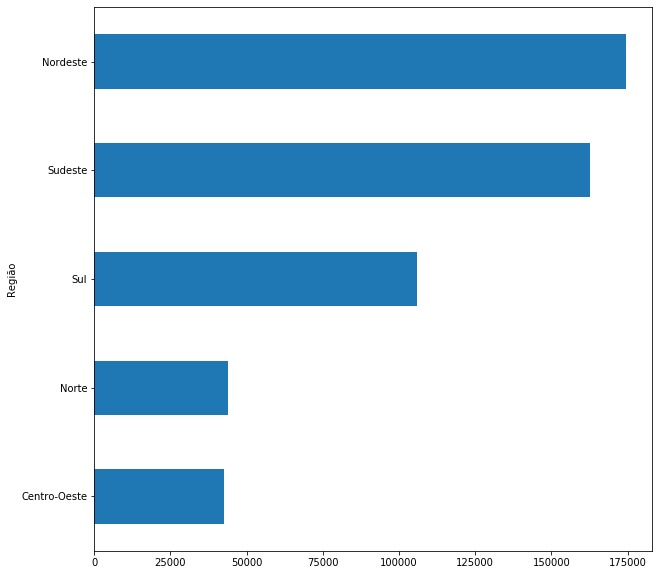

In [7]:
data.groupby('Região').size().sort_values().tail(5).plot(kind='barh', figsize=(10,10))

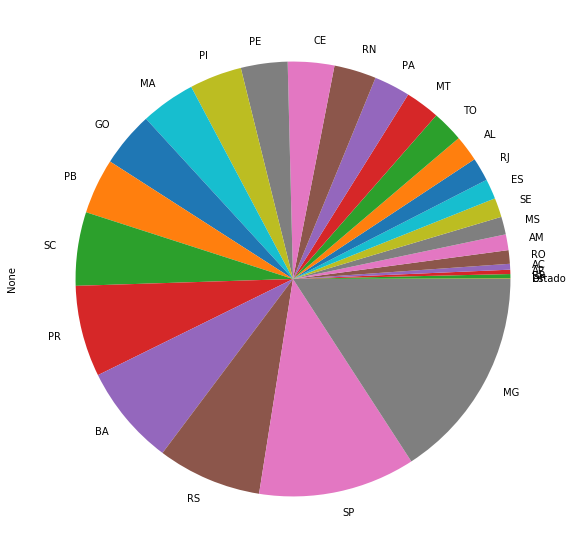

In [124]:
data.groupby('Estado').size().sort_values().plot(kind= 'pie', figsize=(10,10))

In [136]:
estado = data.loc[data['Estado']=='SP']

estado

,Região,Estado,Município,CodUF,CodMun,CodRegiaoSaude,nomeRegiaoSaude,Data,SemanaEpidemia,PopulacaoTotal,...,ObitosAcumulados,ObitosNovos,Recuperados,EmAcompanhamento,Interior/Metropolitana,17,Casos Totais,Obitos Totais,Recuperados Totais,Total em Acompanhamento
2581,Sudeste,SP,NaN,35,NaN,NaN,NaN,25/02/2020,9,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2582,Sudeste,SP,NaN,35,NaN,NaN,NaN,26/02/2020,9,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2583,Sudeste,SP,NaN,35,NaN,NaN,NaN,27/02/2020,9,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2584,Sudeste,SP,NaN,35,NaN,NaN,NaN,28/02/2020,9,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2585,Sudeste,SP,NaN,35,NaN,NaN,NaN,29/02/2020,9,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2586,Sudeste,SP,NaN,35,NaN,NaN,NaN,01/03/2020,10,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2587,Sudeste,SP,NaN,35,NaN,NaN,NaN,02/03/2020,10,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2588,Sudeste,SP,NaN,35,NaN,NaN,NaN,03/03/2020,10,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,Sudeste,SP,NaN,35,NaN,NaN,NaN,04/03/2020,10,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2590,Sudeste,SP,NaN,35,NaN,NaN,NaN,05/03/2020,10,45919049,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
